In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df_cameras = pd.read_csv('https://raw.githubusercontent.com/lejimmy/data-is-beautiful/master/cr200.csv')

In [0]:
df_phones = pd.read_csv('https://raw.githubusercontent.com/lejimmy/data-is-beautiful/master/phone-sales.csv')

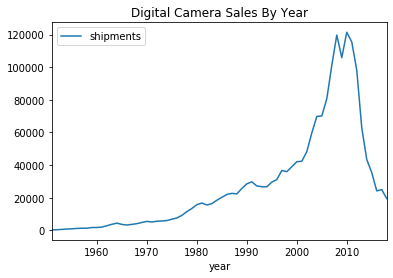

In [296]:
df_cameras.plot('year', 'shipments')
plt.title('Digital Camera Sales By Year');

In [0]:
df_phones = pd.DataFrame(df_phones.T[27])

In [0]:
df_phones.drop('Manufacturer', axis = 0, inplace = True)

In [0]:
df_phones.rename(lambda x:x[:4], inplace = True)

In [0]:
df_phones.rename(columns = {27: 'total_phones'}, inplace = True)

In [0]:
df_phones.reset_index(inplace = True)

In [0]:
df_phones['index'] = df_phones['index'].astype(int)

In [303]:
df_phones

,index,total_phones
0,1992,NaN
1,1993,NaN
2,1994,NaN
3,1995,NaN
4,1996,NaN
5,1997,107.818
6,1998,162.856
7,1999,283.581
8,2000,412.731
9,2001,399.583


In [304]:
df_cameras.head()

,year,shipments,value
0,1951,258,2526
1,1952,376,4353
2,1953,586,6476
3,1954,787,8516
4,1955,949,9816


In [305]:
df_cameras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
year         68 non-null int64
shipments    68 non-null int64
value        68 non-null int64
dtypes: int64(3)
memory usage: 1.7 KB


In [306]:
df_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
index           27 non-null int64
total_phones    22 non-null object
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [0]:
df_cameras['value'] = df_cameras['value'].astype(float)

In [0]:
df_combined = df_cameras.merge(df_phones, how = 'left', left_on = 'year', right_on = 'index')

In [309]:
df_combined

,year,shipments,value,index,total_phones
0,1951,258,2526.0,NaN,NaN
1,1952,376,4353.0,NaN,NaN
2,1953,586,6476.0,NaN,NaN
3,1954,787,8516.0,NaN,NaN
4,1955,949,9816.0,NaN,NaN
...,...,...,...,...,...
63,2014,43434,964516.0,2014.0,1878.97
64,2015,35395,885446.0,2015.0,1423.9
65,2016,24190,710275.0,2016.0,1495.36
66,2017,24978,792817.0,2017.0,1536.5355


In [0]:
df_combined.drop('index', axis = 1, inplace = True)

In [311]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
year            68 non-null int64
shipments       68 non-null int64
value           68 non-null float64
total_phones    22 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


In [0]:
df_combined['total_phones'].fillna(0, inplace = True)
df_combined['total_phones'] = df_combined['total_phones'].astype(float)

In [0]:
df_combined['total_phones'] = df_combined['total_phones'] * 1000000
df_combined['shipments'] = df_combined['shipments'] * 1000

In [314]:
df_combined

,year,shipments,value,total_phones
0,1951,258000,2526.0,0.000000e+00
1,1952,376000,4353.0,0.000000e+00
2,1953,586000,6476.0,0.000000e+00
3,1954,787000,8516.0,0.000000e+00
4,1955,949000,9816.0,0.000000e+00
...,...,...,...,...
63,2014,43434000,964516.0,1.878968e+09
64,2015,35395000,885446.0,1.423900e+09
65,2016,24190000,710275.0,1.495358e+09
66,2017,24978000,792817.0,1.536536e+09


In [315]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
year            68 non-null int64
shipments       68 non-null int64
value           68 non-null float64
total_phones    68 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


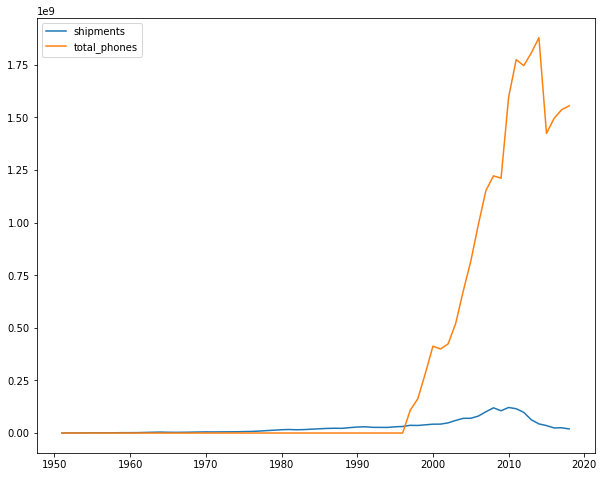

In [320]:
plt.figure(figsize = (10, 8))
plt.plot('year', 'shipments', data = df_combined)
plt.plot('year', 'total_phones', data = df_combined)
plt.legend();